# File Explanation

For this production workflow, I simply load the regression production files and convert the target variable into a encoded variable such that: (x < -15) -> 0; (-15 <= x <= 15) -> 1; (x > 15) -> 2 

In [27]:
import pandas as pd
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
from main.utils import time_utils, data_manage_utils
from IPython.core.display import display

# Variables
ROOT_PATH = os.path.abspath("../../../")
INPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files/CREG")
OUTPUT_FOLDER = os.path.join(ROOT_PATH, "data/preprocessing/processed_files")



C:\Users\chrig\AppData\Local\Temp\ipykernel_9796\1217996140.py:7: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display


In [28]:
X_train, y_train, X_test, y_test = data_manage_utils.load_processed_data_by_folder(INPUT_FOLDER)

In [29]:
def classify_delay(x):
    if x < -15:
        return 0
    elif -15 <= x <= 15:
        return 1
    else:
        return 2

In [30]:
y_train_class = y_train.apply(classify_delay)
y_test_class = y_test.apply(classify_delay)
y_train_class

5998106    2
9744846    1
8656393    2
7404998    0
8855927    2
          ..
6033952    1
7551519    0
7375452    1
7757994    2
7249134    1
Name: ARR_DELAY_MINS, Length: 263204, dtype: int64

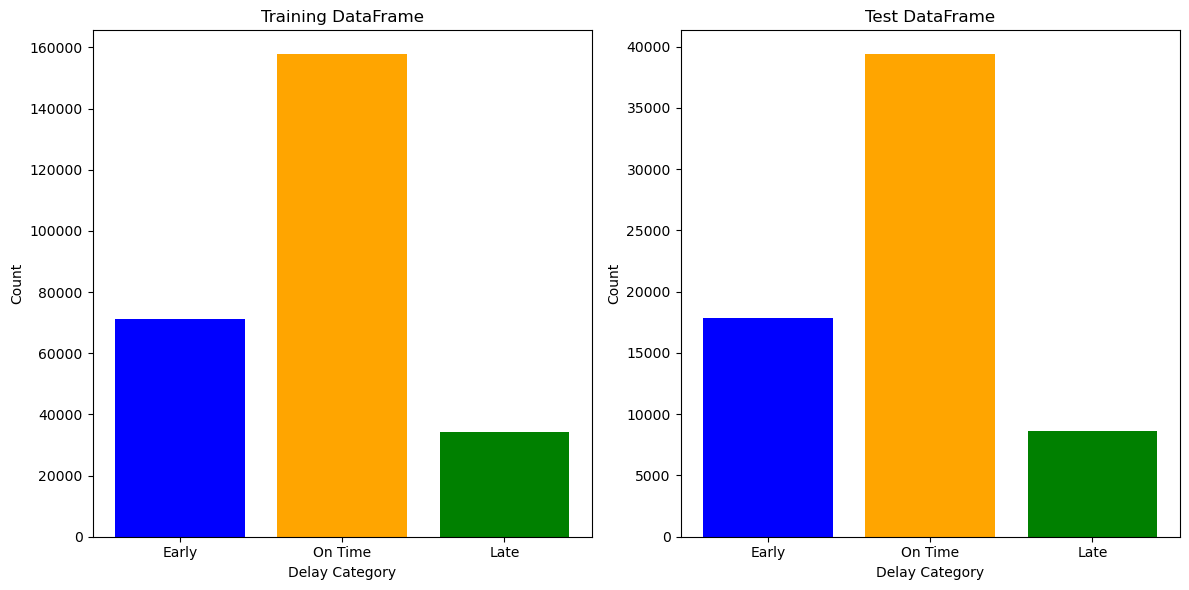

In [31]:
# Calculate value counts for each category
train_counts = y_train_class.value_counts().sort_index()
test_counts = y_test_class.value_counts().sort_index()

# Create a figure and axis objects for the subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))

# Plot for Training DataFrame
axes[0].bar(train_counts.index, train_counts.values, color=['blue', 'orange', 'green'])
axes[0].set_title('Training DataFrame')
axes[0].set_xlabel('Delay Category')
axes[0].set_ylabel('Count')
axes[0].set_xticks([0, 1, 2])
axes[0].set_xticklabels(['Early', 'On Time', 'Late'])

# Plot for Test DataFrame
axes[1].bar(test_counts.index, test_counts.values, color=['blue', 'orange', 'green'])
axes[1].set_title('Test DataFrame')
axes[1].set_xlabel('Delay Category')
axes[1].set_ylabel('Count')
axes[1].set_xticks([0, 1, 2])
axes[1].set_xticklabels(['Early', 'On Time', 'Late'])

# Display the plot
plt.tight_layout()
plt.show()

In [32]:
from main.utils.data_manage_utils import save_processed_data_to_folder

filepath = os.path.join(OUTPUT_FOLDER, "CCLASS")

if not os.path.exists(filepath):
    os.makedirs(filepath)

save_processed_data_to_folder(filepath, X_train, y_train_class, X_test, y_test_class)